In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import dump
from custom_libs import plotting

In [2]:
df = db.get_dataset("chat_dataset")
df.head(2)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative


In [3]:
x_column_name = "message"
x_column_cleaned_name = x_column_name + "_clean"

In [4]:
proprocessing_function = preprocessing.preprocess_text
preprocessing.preprocess_dataframe(df, x_column_name, x_column_cleaned_name, proprocessing_function)
df.head(2)

,message,sentiment,message_clean
0,I really enjoyed the movie,positive,really enjoy movie
1,The food was terrible,negative,food terrible


In [5]:
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEGATIVE if x == "negative" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.POSITIVE if x == "positive" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEUTRAL if x == "neutral" else x)

df.sample(5)

,message,sentiment,message_clean
304,The hotel staff went above and beyond,Positive,hotel staff go beyond
245,The traffic is average,Neutral,traffic average
503,I hate feeling so powerless and helpless ð,Negative,hate feel powerless helpless
506,I can't believe how much work I have to do and...,Negative,believe much work little time
551,I just got a text from my crush asking me out ...,Positive,get text crush ask date


In [6]:
# classification.append_sentiment_for_each_row(df, x_column_cleaned_name, new_column_name='sentiment')
# df.head(3)

In [7]:
X, y = df[x_column_cleaned_name], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy for PassiveAggressiveClassifier with vectorizer CountVectorizer: 0.7264957264957265
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer: 0.7435897435897436
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram: 0.7350427350427351
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Bigram: 0.7692307692307693
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Trigram: 0.7863247863247863


Accuracy for LogisticRegression with vectorizer CountVectorizer: 0.8205128205128205
Accuracy for LogisticRegression with vectorizer TfidfVectorizer: 0.7863247863247863
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram: 0.7863247863247863
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max freq.=0.8 - Bigram: 0.7777777777777778
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max

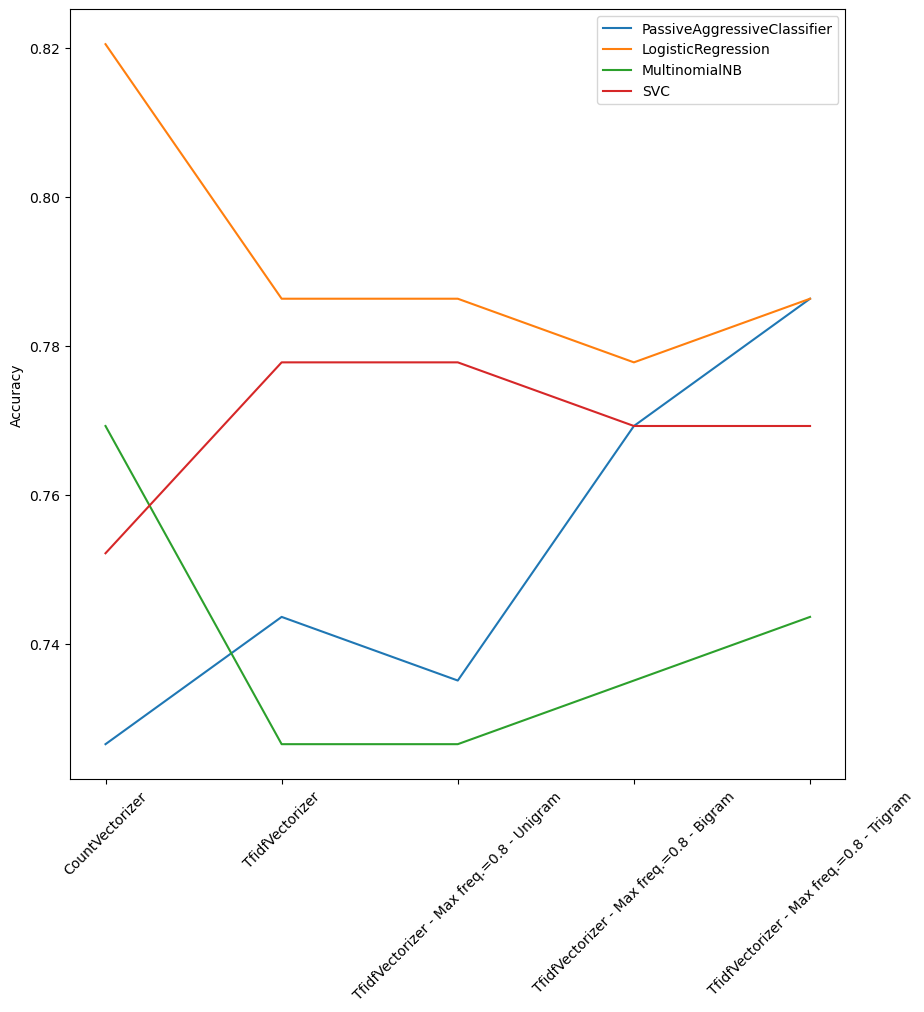

In [8]:
vectorizers = list()
vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

models = [PassiveAggressiveClassifier, LogisticRegression, MultinomialNB, SVC]
labels_vectorizers = ['CountVectorizer', 'TfidfVectorizer', 'TfidfVectorizer - Max freq.=0.8 - Unigram', 
                      'TfidfVectorizer - Max freq.=0.8 - Bigram', 'TfidfVectorizer - Max freq.=0.8 - Trigram']

results_accuracies = classification.test_classifiers(models, vectorizers, labels_vectorizers, x_train, x_test, y_train, y_test)


plotting.plot_accuracies(results_accuracies, labels_vectorizers)



Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.63      0.72        30
     Neutral       0.79      0.93      0.85        54
    Positive       0.87      0.82      0.84        33

    accuracy                           0.82       117
   macro avg       0.83      0.79      0.81       117
weighted avg       0.82      0.82      0.82       117

Confusion matrix, without normalization


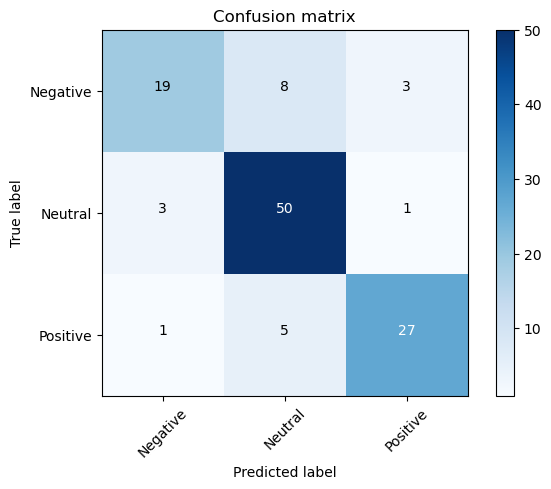

In [9]:
# Best combination of model and vectorizer
vectorizer = CountVectorizer(stop_words='english')
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

class_names = classification.Sentiment.get_all()
model = classification.test_classifier(LogisticRegression, x_train_trasformed, x_test_trasformed, y_train, y_test, class_names)

In [10]:
dump.save_model(model, "model_chat")
dump.save_vectorizer(vectorizer, "vectorizer_chat")

Saving model at: dump_models/model_chat.pkl
Saving vectorizer at: dump_models/vectorizer_chat.pkl
